## Showing the results of the correlation, eof and pca scripts
a) to show what they do  
b) to check that the outputs are reasonable

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [1]:
jemma = 'hi'

In [2]:
import sys
sys.path.append('/glade/u/home/jjeffree/ensemble-analogue-predictability/')
import predictability_tools as pt

In [3]:
pt.jemmafunc()

KeyError: 'jemma'

In [3]:
pt.get_ersstv5_025_ss()

<xarray.DataArray (var: 1, time: 2040, lat: 72, lon: 144)> Size: 85MB
array([[[[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [-1.1920929e-07, -1.1920929e-07, -6.8449974e-04, ...,
          -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
         [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
          -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
         [-5.9604645e-07, -3.4570694e-06, -3.4570694e-06, ...,
          -3.4570694e-06, -3.4570694e-06, -5.9604645e-07]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
...
          -1.1920929e-07, -1.1920929e-07, -3.5762787e-07],
         [-2.0723343e-03, -2.3013353e-03, -2.3934841e-03, ...,
          -6.7222118e-04, -1.4790297e-03, -1.7758608e-03],
         [-1.5715361e-03, -1.6002655e-03, -1.6094446e-03, ...,
          -1.0958910e-03, -1.3837814e-03, -1.5224218e-03]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [-1.1920929e-07, -7.0452690e-05, -1.5001297e-03, ...,
          -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
         [-1.0752678e-04, -2.2530556e-05, -1.1920929e-07, ...,
          -9.6559525e-06, -8.2731247e-05, -1.3804436e-04],
         [-1.1801720e-04, -5.7697296e-05, -3.4570694e-06, ...,
          -5.8054924e-05, -1.0776520e-04, -1.3494492e-04]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2023-12-01
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    depth    (time) float64 16kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
  * lat      (lat) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * var      (var) <U3 12B 'tos'
    month    (time) int64 16kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12

### correlation.py
calculates the correlation between an index (NINO34) and the data variables (tos, zos), and saves it to file

In [12]:
corr_weight = xr.load_dataarray('/glade/work/jjeffree/pca_variations/testing_correlation_weight/ACCESS-ESM1-5_I4_NINO34_L6/weights.nc')

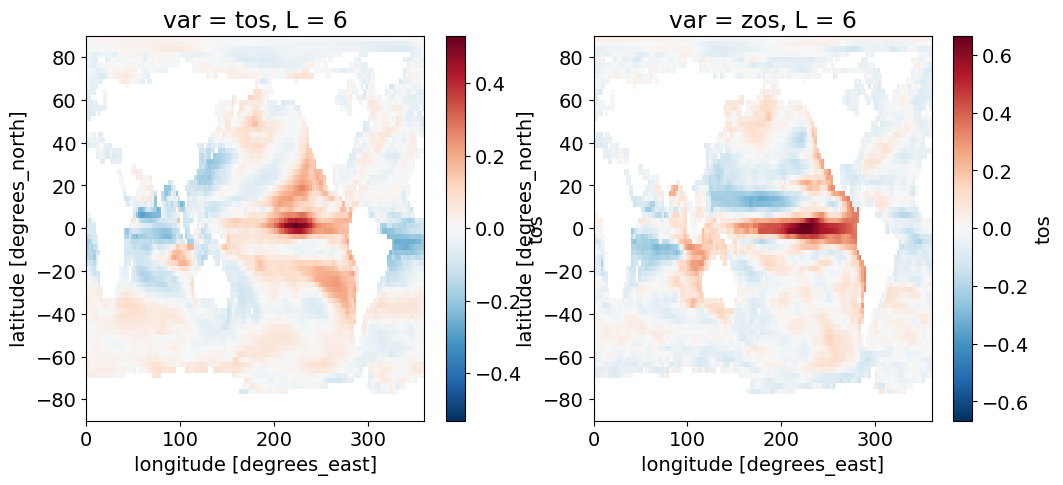

In [14]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
plt.sca(axs[0])
corr_weight.sel(var='tos').plot()
plt.sca(axs[1])
corr_weight.sel(var='zos').plot()

In [15]:
corr_weight_orig = xr.load_dataarray('/glade/work/jjeffree/pca_variations/correlation_weight/ACCESS-ESM1-5_I4_NINO34_L6/weights.nc')

In [17]:
((corr_weight_orig-corr_weight)**2).mean() #YAY :D:D

<xarray.DataArray ()> Size: 8B
array(0.)
Coordinates:
    L        int64 8B 6

### eof_calculation.py
picks out a representative subsample of the data, and calculates eofs for these (after multiplication by the weights)

In [62]:
eof = xr.load_dataset('/glade/work/jjeffree/pca_variations/testing_correlation_weight/ACCESS-ESM1-5_I10_NINO34_L0/ACCESS-ESM1-5_30P_tos_zos/eof.nc')

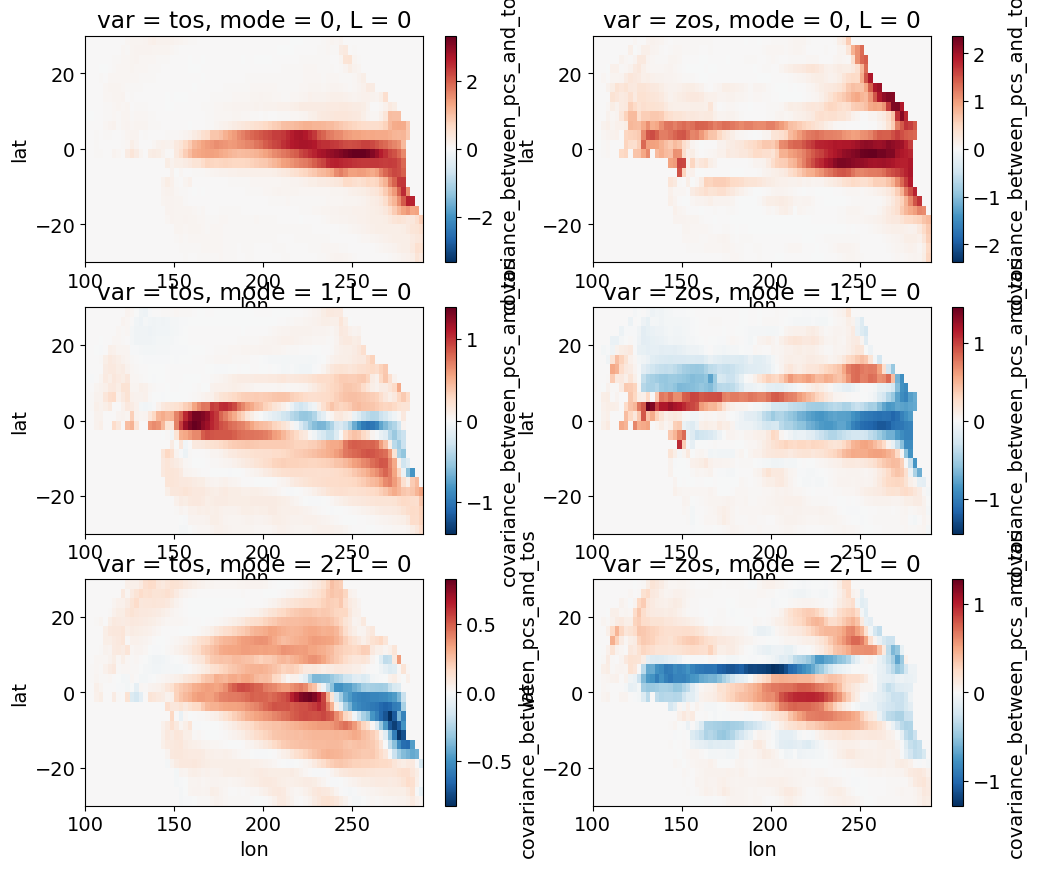

In [63]:
fig, axs = plt.subplots(3,2,figsize=(12,10))
for i in range(3):
    plt.sca(axs[i,0])
    eof.eof.sel(var='tos',mode=i).plot()
    plt.sca(axs[i,1])
    eof.eof.sel(var='zos',mode=i).plot()

In [12]:
eof = xr.load_dataset('/glade/work/jjeffree/pca_variations/testing_correlation_weight/ACCESS-ESM1-5_I4_NINO34_L6/ACCESS-ESM1-5_30P_tos_zos/eof.nc')

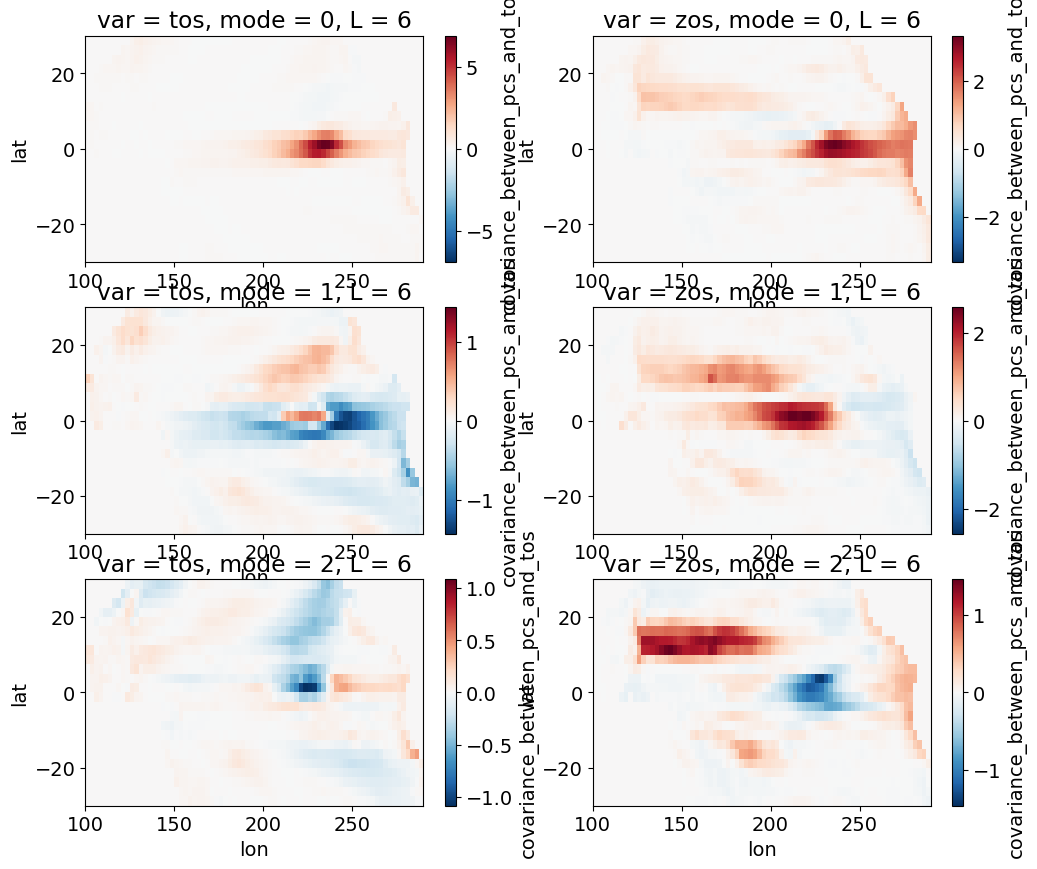

In [84]:
fig, axs = plt.subplots(3,2,figsize=(12,10))
for i in range(3):
    plt.sca(axs[i,0])
    eof.eof.sel(var='tos',mode=i).plot()
    plt.sca(axs[i,1])
    eof.eof.sel(var='zos',mode=i).plot()

In [66]:
original_eof = xr.load_dataset('/glade/work/jjeffree/pca_variations/correlation_weight/ACCESS-ESM1-5_I4_NINO34_L6/ACCESS-ESM1-5_30P_tos_zos/eof.nc')

In [67]:
((eof-original_eof)**2).sum()

<xarray.Dataset> Size: 56B
Dimensions:                  ()
Coordinates:
    L                        int64 8B 6
Data variables:
    eof                      float64 8B 0.0
    pca                      float64 8B 0.0
    variance_fraction        float64 8B 0.0
    variance_fraction_error  float64 8B 0.0
    total_variance           float64 8B 0.0
    scaling                  float64 8B 0.0

### pca_projection.py
project everything else onto those eofs

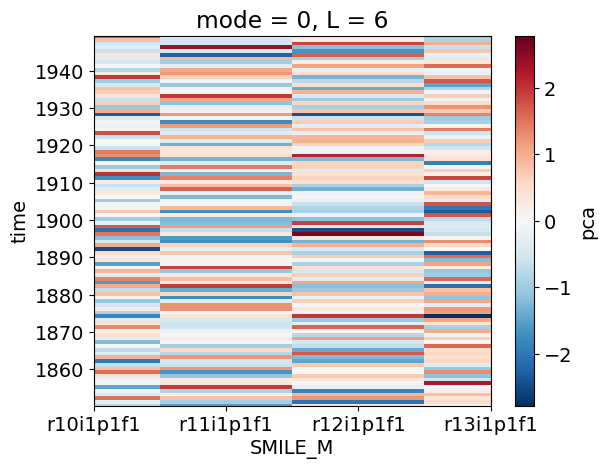

In [81]:
eof.pca.isel(mode=0).plot()

In [91]:
eof = xr.load_dataset('/glade/work/jjeffree/pca_variations/testing_correlation_weight/ACCESS-ESM1-5_I4_NINO34_L6/ACCESS-ESM1-5_30P_tos/eof.nc')

In [92]:
pca = xr.load_dataset('/glade/work/jjeffree/pca_variations/testing_correlation_weight/ACCESS-ESM1-5_I4_NINO34_L6/ACCESS-ESM1-5_30P_tos/pca_ACCESS-ESM1-5_30P_0-10M.nc')

In [97]:
eof.variance_fraction.cumsum()

<xarray.DataArray 'variance_fraction' (mode: 10)> Size: 80B
array([0.58818357, 0.65824975, 0.72514324, 0.75554152, 0.77749848,
       0.79346035, 0.80719304, 0.81999715, 0.83141352, 0.8403014 ])
Coordinates:
  * mode     (mode) int64 80B 0 1 2 3 4 5 6 7 8 9
    L        int64 8B 6

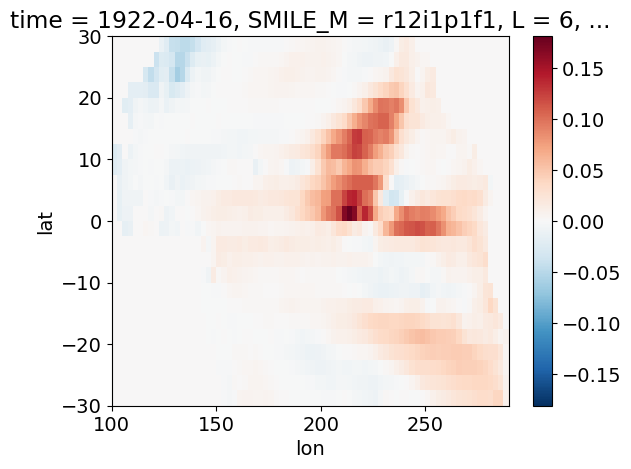

In [104]:
t=72
((eof.pca*eof.eof).sum('mode').isel(time=t,SMILE_M=2,var=0)-(pca.pca*eof.eof).sum('mode').isel(time=t,SMILE_M=2)).plot()

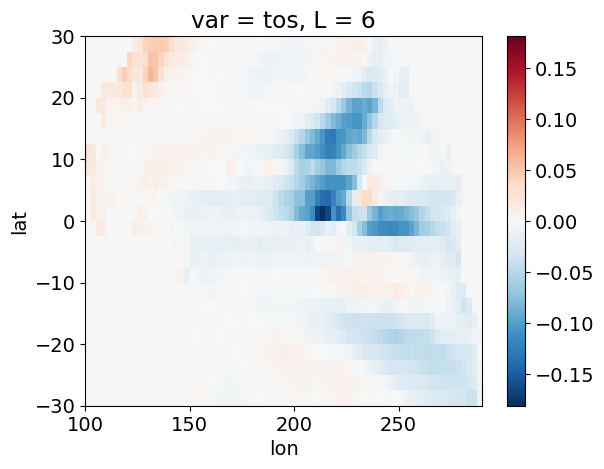

In [115]:
(pca.pca*eof.eof).sum('mode').isel(SMILE_M=slice(0,4)).mean(('time','SMILE_M')).plot()

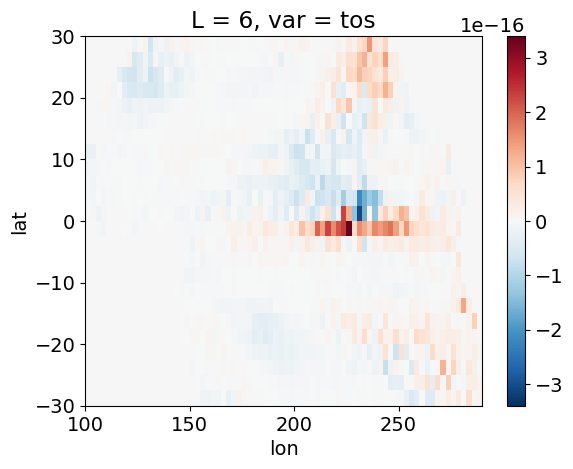

In [112]:
(eof.pca*eof.eof).sum('mode').mean(('time','SMILE_M')).plot()

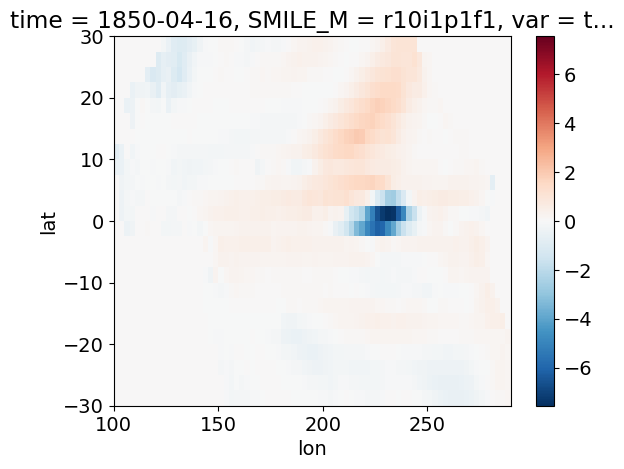

In [75]:
(pca.pca*eof.eof).sum('mode').isel(time=0,SMILE_M=0,var=0).plot()

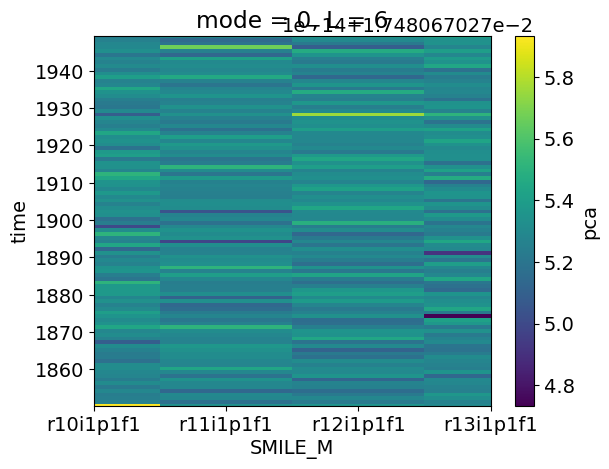

In [116]:
(eof.pca-pca.pca).isel(mode=0).plot()

## Checking projections of other things

In [5]:
pca_obs = xr.load_dataset('/glade/work/jjeffree/pca_variations/testing_correlation_weight/ACCESS-ESM1-5_I4_NINO34_L6/ACCESS-ESM1-5_30P_tos/pca_ERSSTv5_30P.nc')

In [8]:
oldpca_obs = xr.load_dataset('/glade/work/jjeffree/pca_variations/testing_correlation_weight/ACCESS-ESM1-5_I4_NINO34_L6/ACCESS-ESM1-5_30P_tos/pca_ERSSTv5_30P.nc')

In [10]:
((pca_obs-oldpca_obs)**2).sum()

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    pca      float64 8B 0.0

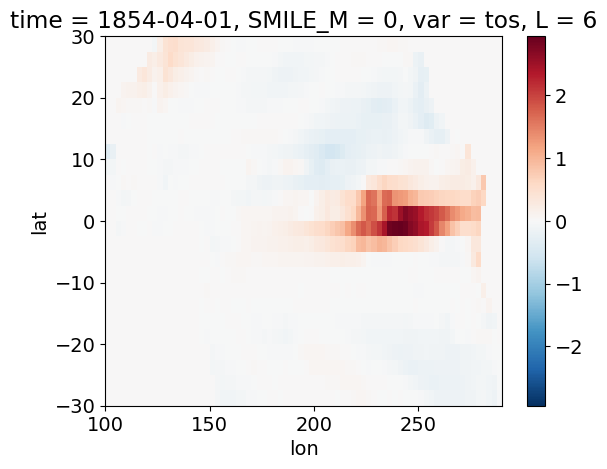

In [19]:
(pca_obs.pca*eof.eof.sel(var='tos')).sum('mode').isel(time=0).plot()